In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_excel("homeprices.xlsx")
data.head()

#Area is in sqfeet and puce is in lakh

,Area,Price
0,437,30
1,438,31
2,450,32
3,497,34
4,508,36


In [3]:
data.describe()

,Area,Price
count,35.000000,35.000000
mean,664.771429,46.971429
std,122.034731,9.141006
min,437.000000,30.000000
25%,597.000000,39.500000
50%,662.000000,48.000000
75%,748.000000,55.500000
max,887.000000,60.000000


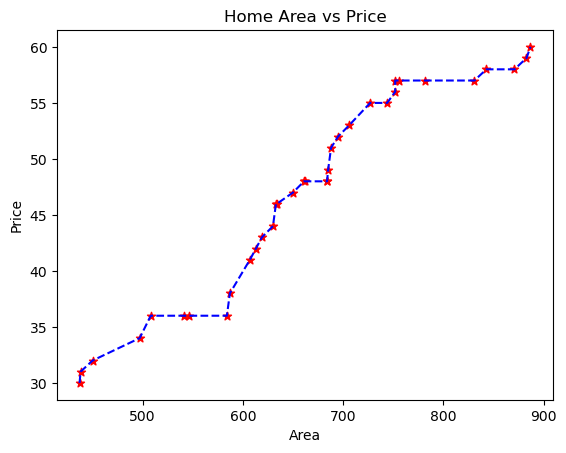

In [4]:
%matplotlib inline
plt.title("Home Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(data["Area"], data["Price"], color="red", marker = "*") # Will plot scatter
plt.plot(data["Area"], data["Price"], "b--")  # will plot line
plt.show()

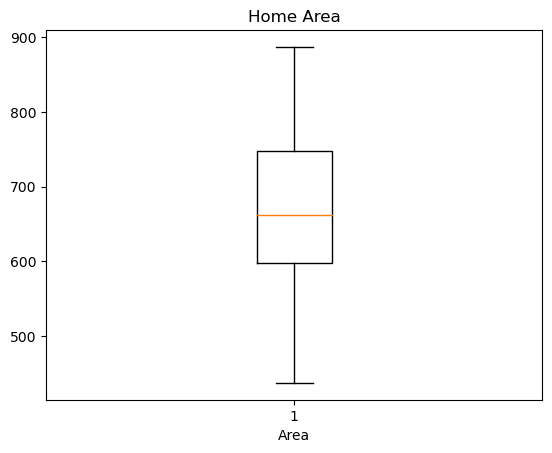

In [5]:
%matplotlib inline
plt.title("Home Area")
plt.xlabel("Area")
plt.boxplot(data["Area"])
plt.show()

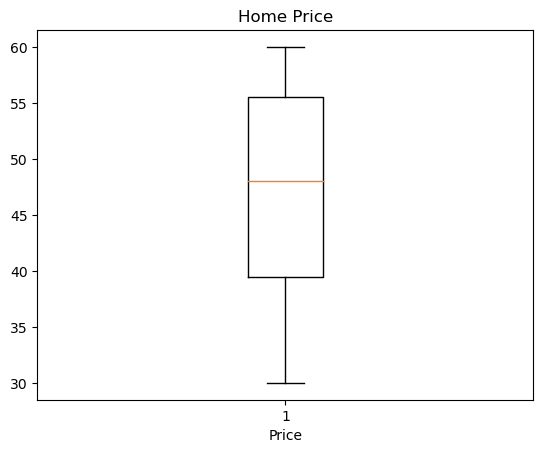

In [6]:
%matplotlib inline
plt.title("Home Price")
plt.xlabel("Price")
plt.boxplot(data["Price"])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

In [9]:
X = data.drop("Price", axis=1)
y = data["Price"]

In [10]:
X.head(2)

,Area
0,437
1,438


In [11]:
y.head(2)

0    30
1    31
Name: Price, dtype: int64

In [12]:
lr.fit(X, y)

LinearRegression()

In [13]:
lr.predict([[740]])

C:\Users\ARUN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52.42042166])

In [15]:
y_pred = lr.predict(X)

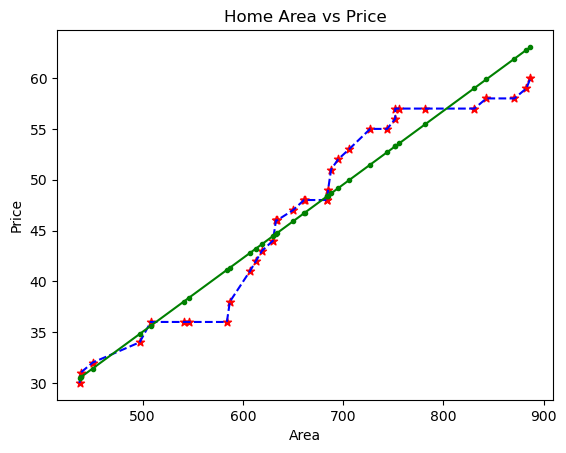

In [16]:
%matplotlib inline
plt.title("Home Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(data["Area"], data["Price"], color="red", marker = "*")
plt.plot(data["Area"], data["Price"], "b--")  # will plot line
plt.plot(data["Area"], y_pred, "g.-")
plt.show()

In [17]:
m = lr.coef_    # Slope / Coefficient
c = lr.intercept_    # Intercept

In [19]:
m*740+c

array([52.42042166])

In [20]:
print("Slope", m)
print("Intercept", c)

Slope [0.07243249]
Intercept -1.1796242939444


In [21]:
import numpy as np

In [22]:
X1 = np.random.randint(100,900,30)

In [23]:
Y1 = np.random.randint(10,50,30)

In [24]:
X1

array([613, 569, 176, 187, 578, 764, 468, 407, 107, 177, 268, 122, 474,
       668, 353, 617, 600, 181, 396, 667, 721, 320, 342, 439, 529, 673,
       745, 409, 262, 639])

In [25]:
Y1

array([40, 21, 14, 44, 42, 34, 31, 43, 36, 24, 26, 13, 45, 44, 12, 25, 12,
       34, 31, 43, 33, 47, 19, 32, 49, 24, 39, 13, 20, 20])

In [26]:
X1.sort()

In [27]:
Y1.sort()

In [28]:
data = {"Input":X1,"Output":Y1}

In [29]:
data

{'Input': array([107, 122, 176, 177, 181, 187, 262, 268, 320, 342, 353, 396, 407,
        409, 439, 468, 474, 529, 569, 578, 600, 613, 617, 639, 667, 668,
        673, 721, 745, 764]),
 'Output': array([12, 12, 13, 13, 14, 19, 20, 20, 21, 24, 24, 25, 26, 31, 31, 32, 33,
        34, 34, 36, 39, 40, 42, 43, 43, 44, 44, 45, 47, 49])}

In [35]:
df = pd.DataFrame(data)

In [36]:
df.head()

,Input,Output
0,107,12
1,122,12
2,176,13
3,177,13
4,181,14


In [39]:
lr2 = LinearRegression()

In [40]:
lr2.fit(df.drop("Output", axis=1), df["Output"])

LinearRegression()

In [41]:
y_pred2 = lr2.predict(df.drop("Output", axis=1))

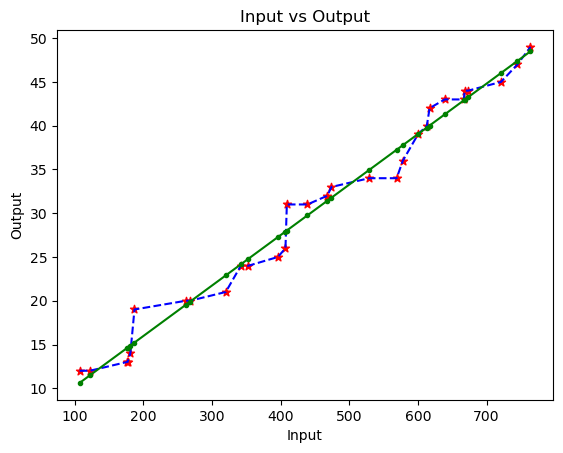

In [42]:
%matplotlib inline
plt.title("Input vs Output")
plt.xlabel("Input")
plt.ylabel("Output")
plt.scatter(df["Input"], df["Output"], color="red", marker = "*")
plt.plot(df["Input"], df["Output"], "b--")  # will plot line
plt.plot(df["Input"], y_pred2, "g.-")
plt.show()

In [43]:
y = df["Output"]

In [44]:
y_mean = y.mean()

In [45]:
y_mean

30.333333333333332

In [46]:
MSE = (((y - y_pred2)**2).sum())/len(y)
MSE

2.4197838446085087

In [47]:
MAE = (np.abs((y - y_pred2)).sum())/len(y)
MAE

1.2378801412205633

In [48]:
R2 = 1 - ((y - y_pred2)**2).sum() / ((y - y_mean)**2).sum()
R2

0.9818818181352108

In [49]:
Adj_R2 = 1 - ((1-R2)*(len(y)-1))/(len(y) -len(df.drop("Output",axis=1).columns)-1)
Adj_R2

0.9812347402114683

In [50]:
from sklearn.metrics import mean_absolute_error, r2_score

In [51]:
mean_absolute_error(y, y_pred2)

1.2378801412205633

In [52]:
r2_score(y, y_pred2)

0.9818818181352108